In [162]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_mldata
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.activations import softmax
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

In [163]:
train = pd.read_csv("train.csv").values
test = pd.read_csv("test.csv").values

In [164]:
train.shape

(42000, 785)

In [165]:
test.shape

(28000, 784)

In [166]:
X_train = train[:, 1:].astype('float32')
Y_train = train[:, 0].astype('int32')
X_test = test[:, :].astype('float32')


In [167]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [168]:
#Reshaping train to 28 * 28 pixel size with 1 color (grey scale)
X_train = X_train.reshape(-1, 28, 28, 1)
#X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [169]:
#Reshaping test to 28 * 28 pixel size with 1 color (grey scale)
X_test = X_test.reshape(-1, 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [170]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [174]:
#Label encoding
Y_train = to_categorical(Y_train, num_classes = nClasses)

In [175]:
# Normalize the data,
# Colors are from 0 to 255. 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [176]:
#Label encoding
y_train = to_categorical(y_train, num_classes = nClasses)

In [177]:
y_train.shape

(33600, 10, 10, 10)

In [178]:
np.random.seed(0)

In [179]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33600, 28, 28, 1)
(33600, 10)
(8400, 28, 28, 1)
(8400, 10)


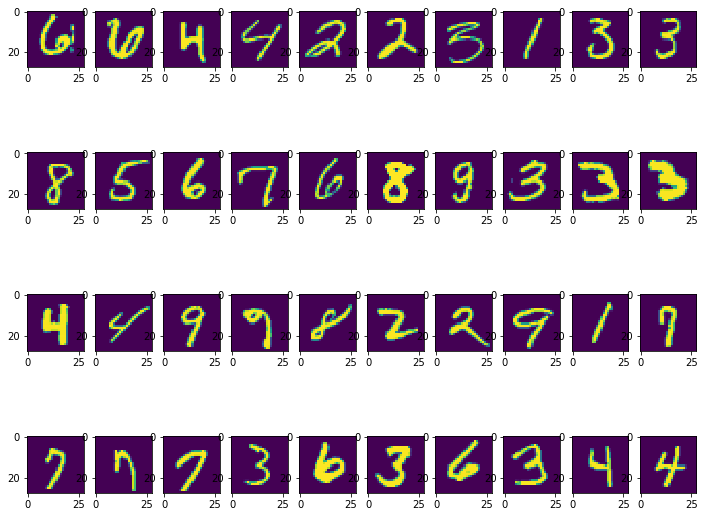

In [180]:
%matplotlib inline
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [181]:
#Check for null and missing values, converting to pandas dataframe

In [182]:
#x_train.isnull().any().describe()

In [183]:
#x_test.isnull().any().describe()

In [184]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15)
datagen.fit(X_train)

In [185]:
model = Sequential()
    #use Conv2D to create our first convolutional layer, with 32 filters, 5x5 filter size, 
    #input_shape = input image with (height, width, channels), activate ReLU to turn negative to zero
model.add(Conv2D(16, kernel_size=(5, 5),
                activation='relu',
                input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),
                padding='same',
                activation='relu'))
model.add(BatchNormalization())
    #add a pooling layer for down sampling
model.add(MaxPool2D(pool_size=(2, 2)))
    #set 25% of the layer's activation to zero, to void overfit
model.add(Dropout(0.25))
    # add another conv layer with 64 filters, 3x3 filter size,
model.add(Conv2D(64, kernel_size=(3, 3),
                padding='same',
                activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3),
                padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    #convert a 2D matrix in a vector
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
    #add a fully-connected layer with softmax function to squash values to 0...1 
model.add(Dense(10, activation='softmax')) #tanh


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



In [186]:
#print( keras.__version__ )
#print( tensorflow.__version__ )

In [187]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
dropout_53 (Dropout)         (None, 8, 8, 64)          0         
__________